In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
import numpy as np
import seaborn as sns
import squarify

In [6]:
addr = './expenditures.txt'
df_exp = pd.read_table(addr)
df_exp.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [7]:
addr1 = "./unemployement-rate-1948-2010.csv"
df_unemp = pd.read_csv(addr1 )
df_unemp.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


## Area Chart

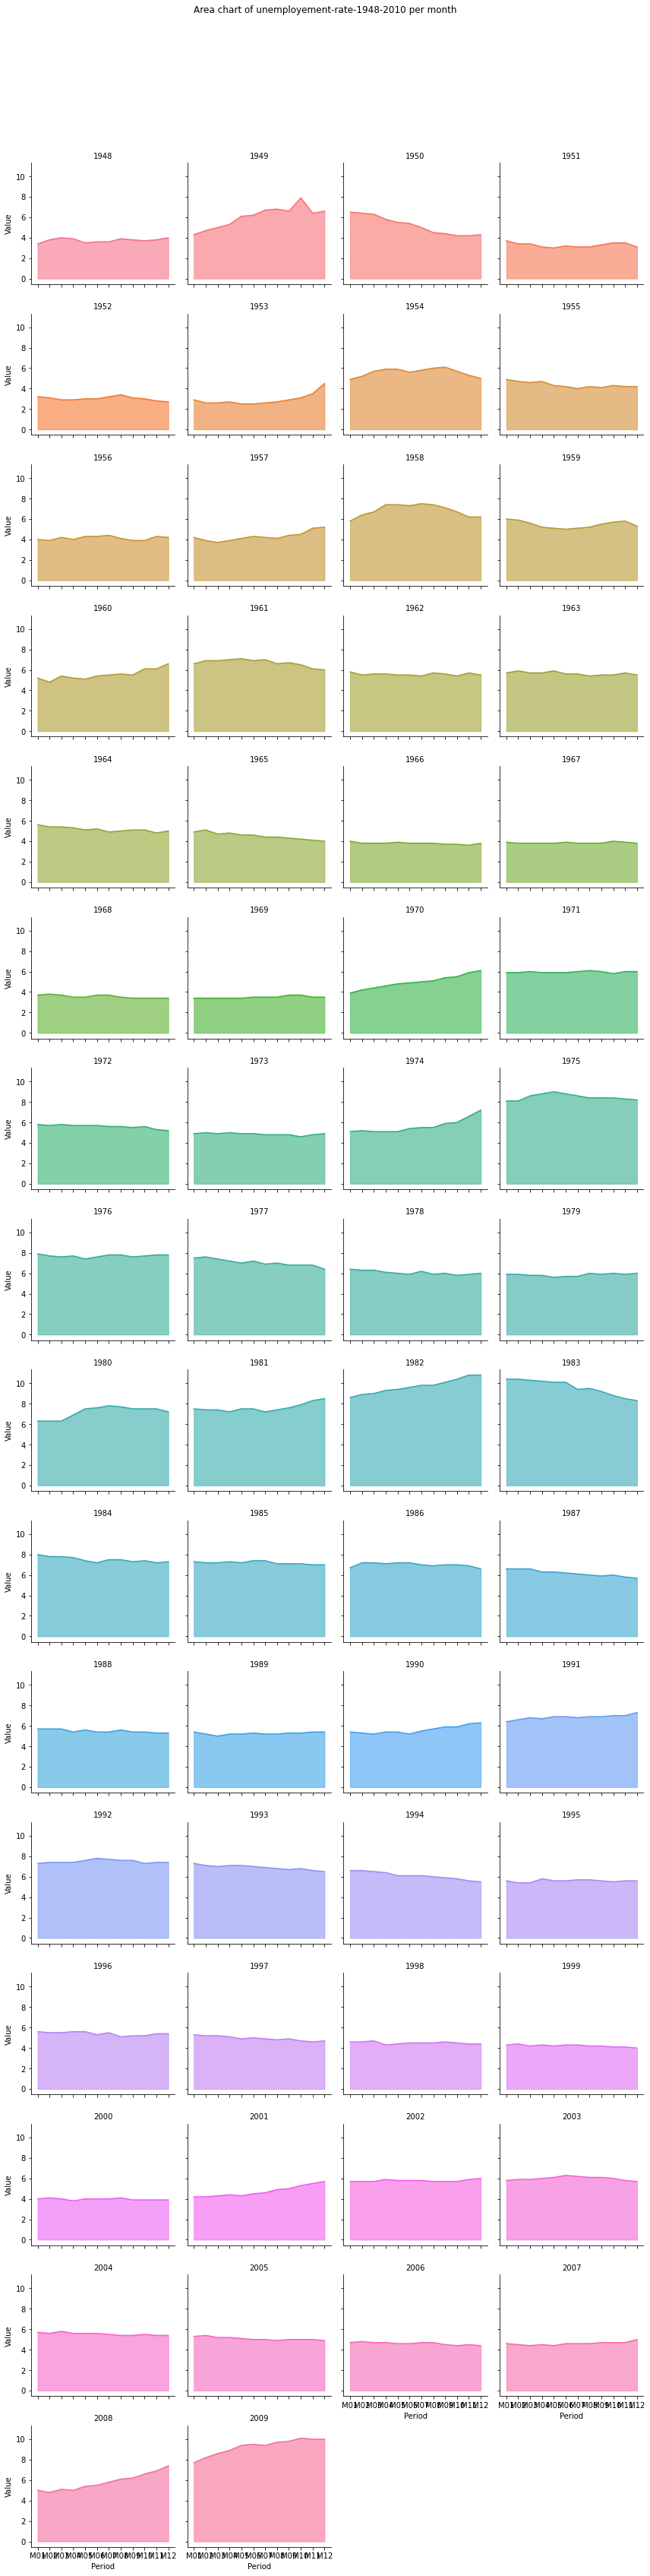

In [8]:
g = sns.FacetGrid(df_unemp, col='Year', hue='Year', col_wrap=4, )
g = g.map(plt.plot, 'Period', 'Value')
g = g.map(plt.fill_between, 'Period', 'Value', alpha=0.6).set_titles("{col_name} Year")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Area chart of unemployement-rate-1948-2010 per month')
plt.show()

## Stacked Area Chart

In [27]:
import plotly.express as px
  

  
fig = px.area(df_unemp, x="Period", y="Value",
            color="Year",
            hover_data=['Period'],
             )
  
fig.show()

In [28]:
import plotly.express as px
  

  
fig = px.area(df_exp, x="year", y="expenditure",
            color="category",
            hover_data=['year'],
             )
  
fig.show()

## Tree Map

In [10]:
df_exp

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1
...,...,...,...,...
345,1984,Education,303,1
346,1984,Tobacco Products,228,1
347,1984,Miscellaneous,451,1
348,1984,Cash Contributions,706,1


In [11]:
df_exp_data = df_exp[df_exp['year'] == 2008]

In [13]:

df = df_exp_data.sort_values(by="expenditure", ascending=False)

df["Percentage"] = round(100 * df["expenditure"] / sum(df["expenditure"]), 2)

df["Label"] = df["category"] + " (" + df["Percentage"].astype("str") + "%)"


In [14]:
df.to_csv('exp_cumulative.csv')

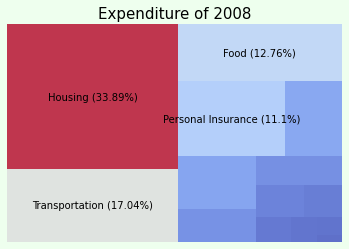

In [23]:
# Get Axis and Figure
fig, ax = plt.subplots()
# Our Colormap
cmap = matplotlib.cm.coolwarm
# Min and Max Values
mini = min(df["expenditure"])
maxi = max(df["expenditure"])
# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df["expenditure"]]
# Plotting
squarify.plot(sizes=df["expenditure"], label=df["Label"][:4], alpha=0.8, color=colors)
# Removing Axis
plt.axis('off')
# Invert Y-Axis
plt.gca().invert_yaxis()
# Title
plt.title("Expenditure of 2008", fontsize=15)
# Title Positioning
ttl = ax.title
ttl.set_position([.5, 1.05])
# BG Color
fig.set_facecolor('#eeffee')

In [21]:
df_exp.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [22]:
import plotly.express as px
fig = px.treemap(df_exp, 
                 path=['year', 'category'], 
                 values='expenditure'
                 #,color='NA_Sales'
                )
fig.show()